# Math 4 Data Science

## 1) Convex Optimization

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

We would like to find the solution for $Ax=b$ with 4 iteratives algorithms where 
$$ A = \begin{pmatrix} 2 & 3 \\ 3 & 5 \end{pmatrix}, \hspace{5mm}         b = (13,21), \hspace{5mm} x_0=(1,1)$$

In [2]:
A = np.array([[2,3],[3,5]])
b = np.array([13,21])
x0 = np.array([1,1])

### 1.1) Gauss-Siedel Iterations

We can define $A = L + U$ where $L$ is a lower-triangular matrix and $U$ is a strictly upper triangular. So:
$$ Ax = (L + U)x = Lx + Ux = b \rightarrow x = -L^{-1}Ux + L^{-1}b = Bx + z $$ where
$$B = -L^{-1}U, z = L^{-1}b$$
so the Gauss-Siedel iterations are: $x_{i+1} = Bx_i + z$

Here is a function that calculates matrix $B$ and vector $z$ from given matrix $A$ and vector $b$ according to Gauss-Siedel:

In [3]:
def GauSei(A, b):
    L = np.tril(A)
    U = A - L
    l = np.linalg.inv(L)
    B = -l @ U
    z = l @ b
    return [B, z]
    

In [4]:
def Iterations(B, z, x0, maxIters = 1000, delta = 10**-5):
    gap = np.inf
    i = 0
    xi = x0
    ans = np.empty((maxIters,2))
    while (gap > delta and i < maxIters):
        ans[i] = xi
        xi = B @ xi + z
        gap = max(abs(ans[i]-xi))
        i += 1
    return ans[:i, :]

The algorithm converged after 100 iterations


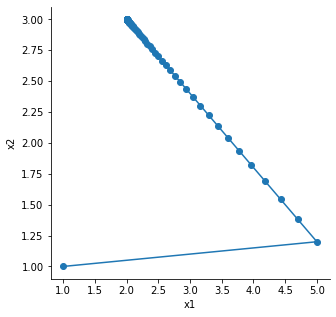

In [5]:
B,z = GauSei(A, b)
results = Iterations(B, z, x0)
print("The algorithm converged after " + str(len(results)) + " iterations")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(results[:,0],results[:,1], "o-")
ax.set(xlabel='x1', ylabel='x2')
sns.despine()

### 1.2) Jacobi Iterations

We can define $A = D + E$ where $D$ is a diagonal matrix. So:
$$ Ax = (D + E)x = Dx + Ex = b \rightarrow x = -D^{-1}Ex + D^{-1}b = Bx + z $$ where
$$B = -D^{-1}E, z = D^{-1}b$$
so the Jacobi iterations are: $x_{i+1} = Bx_i + z$

Here is a function that calculates matrix $B$ and vector $z$ from given matrix $A$ and vector $b$ according to Jacobi:

In [6]:
def jacobi(A, b):
    D = np.diag(np.diag(A))
    E = A - D
    d = np.linalg.inv(D)
    B = -d @ E
    z = d @ b
    return [B, z] 

The algorithm converged after 247 iterations


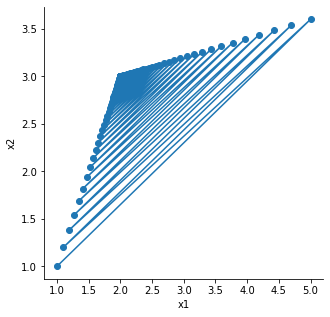

In [11]:
B,z = jacobi(A, b)
results = Iterations(B, z, x0)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(results[:,0],results[:,1], "o-")
ax.set(xlabel='x1', ylabel='x2')
sns.despine()
print("The algorithm converged after " + str(len(results)) + " iterations")


### 1.3) Gradient Descent

The iterations in gradient-descent algorithm are: $$x_{i+1} = x_i -\alpha_i\nabla f(x_i)$$

When $A$ is symmetric and positive definite $Ax = b$ equivalent to minimize the following function: $$f(x) = \frac{1}{2}  x^TAx - b^Tx $$
In our case $A$ is indeed symmetric and positive definite (all eigenvalues are greater than zero) so:
$$\nabla f(x) = Ax-b$$

The exact line searches define the size of $\alpha_i$: $$\alpha_i=argmin\{f(x_{i+1})\}$$
Using the chain rule we get: $$\frac{\partial f(x_{i+1})}{\partial \alpha}=\frac{\partial f(x_{i+1})}{\partial x_{i+1}}*\frac{\partial x_{i+1}}{\partial \alpha}=0 \rightarrow \alpha_i=\frac{(Ax_i-b)^T(Ax_i-b)}{(Ax_i-b)^TA(Ax_i-b)}$$

In [8]:
def stepSize(A, x, b):
    temp = A @ x - b
    return (temp.T @ temp) / (temp.T @ A @ temp) 

In [13]:
gap = np.inf
delta = 10 ** -5
i = 0
xi = x0
ans = np.empty((500,2))
while (gap > delta and i < 500):
    ans[i] = xi
    alpha = stepSize(A, xi, b)
    xi = xi - alpha * (A @ xi - b).T
    gap = max(abs(ans[i]-xi))
    i += 1
results = ans[:i, :]   

The algorithm converged after 5 iterations


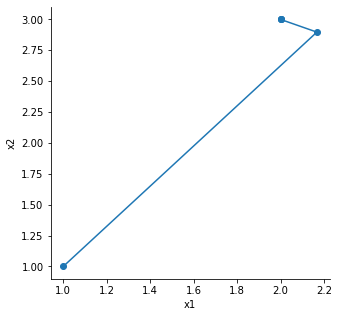

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
print("The algorithm converged after " + str(len(results)) + " iterations")
ax.plot(results[:,0],results[:,1], "o-")
ax.set(xlabel='x1', ylabel='x2')
sns.despine()

## 2) Sampling
The goal is to generate samples from $X\sim Binom (10,5)$ distribution with samples from Uniform $(0,1)$

In [19]:
n = 10
p = 0.5

### 2.1) Inverse Probabilty Transform

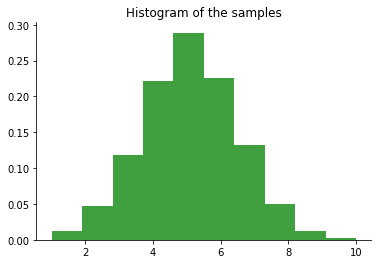

In [61]:
samples = scipy.stats.uniform.rvs(size=1000)
results = scipy.stats.binom.ppf(samples, n, p)
plt.hist(results, alpha=0.75, color='green', density=True)
plt.title('Histogram of the samples')
sns.despine()

### 2.2) Accept - Reject
With proposals from  $G \sim Unif_D[0,10]$ distribution.

So for $0\leq k\leq 10, \hspace{2mm} P[G=k]=\frac{1}{11}$

So $m:=11*max{P[X=k]}$

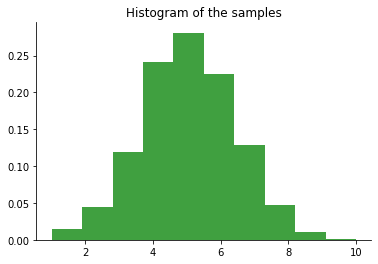

In [62]:
m = scipy.stats.binom.pmf(range(n+1), n, p).max() * 11
results = np.empty(1000)
for i in range(1000):
    flag = True
    while flag:
        x = np.floor(11 * scipy.stats.uniform.rvs(size=1))
        u = scipy.stats.uniform.rvs(size=1)
        if (scipy.stats.binom.pmf(x, n, p) * 11 >= m * u):
            flag = False
    results[i] = x
plt.hist(results, alpha=0.75, color='green', density=True)
plt.title('Histogram of the samples')
sns.despine()
    

### 2.3) Metropolis - Hastings

We work with $X_n$ proposals from the discrete uniform distribution- $X_n \sim Unif_D[X_{n-1}-2,X_{n-1}+2]$.

So, $P[X_n=j|X_{n-1}=i]=\frac{1}{5} \hspace{3mm} \forall i,j,n$

Therefore the accepted probabilities are: $$a_{ij}=min\{1, \frac{\pi(X_n)}{\pi(X_{n-1})}\}$$

where $\pi(k)=P[Y=k]$ when $Y\sim Binom(10,0.5)$

To generate the proposals I used $X_n = X_{n-1}-2+\lfloor{5*u}\rfloor$, when $u \sim Unif(0,1)$ and started the chain with $X_0 = 5$. 

In [63]:
def proposal(x):
    return x - 2 + np.floor(5 * scipy.stats.uniform.rvs(size=1))

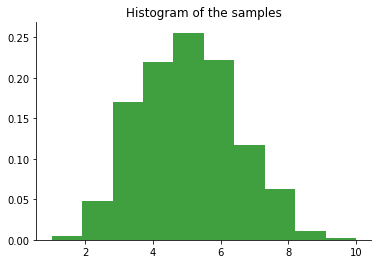

In [68]:
results = np.empty(1000)
xi = 5
for i in range(1000):
    proposal_x = proposal(xi)
    a = scipy.stats.binom.pmf(proposal_x, n, p) / scipy.stats.binom.pmf(xi, n, p)
    if(scipy.stats.uniform.rvs(size=1) <= a):
        xi = proposal_x
    results[i] = xi

plt.hist(results, alpha=0.75, color='green', density=True)
plt.title('Histogram of the samples')
sns.despine()

## 3) Linear Congruent Generator

In [69]:
a = 1664525
c = 0
m = 2 ** 32
x0 = 3

In [70]:
def LC_Generator(a, c, m, x0, n):
    res = np.empty(n)
    x = x0
    for i in range(n):
        x = (a * x + c) % m
        res[i] = x
    return res
        

In [71]:
print(LC_Generator(a, c, m, x0, 10))

[4.99357500e+06 1.16870912e+09 2.32464319e+08 4.76952243e+08
 4.29238505e+09 1.04424657e+09 1.25890258e+09 3.21460644e+09
 2.25977729e+09 7.40218203e+08]


$$
\begin{pmatrix} 1 & 4993575 \\ 2 & 1168709115\\
     3 & 232464319\\
     4 & 476952243\\
     5 & 4292385047\\
     6 & 1044246571\\
     7 & 1258902575\\
     8 & 3214606435\\
     9 & 2259777287\\
     10 & 740218203\\
\end{pmatrix}
$$

## 4) Sochastic Processes

Let $N_t$ be a simple birth process.

The distribution of the times between events in a Poisson Process is exponential with parameter $\lambda$. In this process the parameter is changing when there is a "birth"- $\lambda_i=\lambda*i$. I will show that the time between events when \(N(t)=n\) is distributed exponential with parameter $n*\lambda$:

$$P[N(t+s+h)=n|N(t)=n]=P[No \hspace{2mm} events \hspace{2mm} in \hspace{2mm} the \hspace{2mm} interval \hspace{2mm} time \hspace{2mm} [t,t+s+h]]$$ $$=P[No \hspace{2mm} events \hspace{2mm} in \hspace{2mm} the\hspace{2mm} interval\hspace{2mm} [t,t+s]]*P[No\hspace{2mm} events\hspace{2mm} in\hspace{2mm} the\hspace{2mm} interval\hspace{2mm} [t+s,t+s+h]]$$

notation: $P[No\hspace{2mm} events\hspace{2mm} in\hspace{2mm} the\hspace{2mm} interval\hspace{2mm} in\hspace{2mm} size\hspace{2mm} s]=P_0(s)$ so:
$$P[N(t+s+h)=n|N(t)=n]=P_0(s+h)=P_0(s)*P_0(h)=P_0(s)*(1-n*\lambda-o(h))$$
The last equality follows from definition of simple birth process.

After dividing by $h$ and tend it to zero I got:
$$\frac{\partial}{\partial s}P_0(s)=-n*\lambda P_0(s)$$
which yields the equation: $P_0(s)=e^{-n\lambda s}$, i.e. the probability to zero events in time interval of size $s$ given that $N=n$ is $e^{-n\lambda s}$.



Let $X_1$ be the time until the first event and leads the process to $N=n$, and $X_2$ be  the time between the first and second events. Suppose that first event occurs at time $t$:
$$P[X_2>s|X_1=t=P[No \hspace{2 mm} events  \hspace{2 mm} in  \hspace{2 mm} [t,t+s]|X_1=t]=P[No \hspace{2 mm} events  \hspace{2 mm} in  \hspace{2 mm} [t,t+s]$$

the last equality is correct because there is no overlapping between the intervals, and I showed before that:
$$P[No \hspace{2 mm} events  \hspace{2 mm} in  \hspace{2 mm} [t,t+s]=P_0(s)=e^{-n\lambda s}$$
which is an exponential distribution.

Therefore, and because the events are independent (Poisson Process) the likelihood is (under the assumption that $N(0)=1$):

$$\prod_{i=1}^{N}f(X_i)=\prod_{i=1}^{N} i\lambda e^{-i\lambda X_i}=N!\lambda^N e^{-\lambda\sum_{i=1}^{N}iX_i}$$

## 5) Markov Chains
I'll prove that for Transition Matrix $P$ there is no eigenvalue $\lambda$ such as $|\lambda|>1$.

By definition, $P=(p)_{ij}\in M^{n\times n}$ is a transition matrix if the 2 following conditions are hold:

1. Each entry $p_{ij}$ is non-negative, i.e. $p_{ij}\geq 0 \hspace{2 mm} \forall i,j$.
2. The sum of the entries of each row is $1$, i.e. $\sum_{j=1}^{n}p_{ij}=1 \hspace{2 mm} \forall i$


Let $\lambda$ be an eigenvalue and let $v$ be the corresponding eigenvector, so $Pv=\lambda v$.

$$Pv=\begin{bmatrix}
    p_{11}v_1+ p_{12}v_2+ \dots +p_{1n}v_n     \\
    p_{21}v_1+ p_{22}v_2+\dots +p_{2n}v_n        \\
    \vdots \\
     p_{n1}v_1+ p_{n2}v_2+\dots +p_{nn}v_n       
\end{bmatrix} = \begin{bmatrix}
    \lambda v_1     \\
    \lambda v_2       \\
    \vdots \\
     \lambda v_n      
\end{bmatrix}=\lambda v
$$

Without the loss of generality we assume that  $|v_k|=max\{|v_1|,|v_2|, \dots, |v_n|\}$. $|v_k|>0$ otherwise $v_i=0 \hspace{2 mm} \forall i$ which contradicts that an eigenvector is a nonzero vector. 

From the equation above, if we look on the $k$-th row we get:
$$|\lambda|*|v_k|=|p_{k1}v_1+ p_{k2}v_2+\dots +p_{kn}v_n|$$ $$\leq p_{k1}|v_1|+ p_{k2}|v_2|+\dots +p_{kn}|v_n| \hspace{2 mm}\textit{(by the triangle inequality and \(p_{ij}\geq0\))} $$ $$\leq p_{k1}|v_k|+ p_{k2}|v_k|+\dots +p_{kn}|v_k| \hspace{2 mm}\textit{\((|v_k|\) is the maximal)}$$ $$=(p_{k1}+p_{k2}+\dots+p_{kn})|v_k|=|v_k|$$
Since $|v_k|>0$ we get that $|\lambda|\leq 1$


## 6) Moore-Penrose Pseudo- Inverse
Define $H:=(X^{'}X)^{-1}X^{'}$ the "Hat-Matrix".
To show that $H$ is the Moore-Penrose Pseudo-Inverse of the matrix $X$ we need to show the following:
1. $XHX=X$
2. $HXH=H$
3. $(XH)^{'}=XH$
4. $(HX)^{'}=HX$



$H$ is defined well iff $X^{'}X$ is invertible, so I assumed that the columns of $X$ are linearly independent. In addition, notice that $X^{'}X$ is symmetric and therefore it invertible symmetric as well :
$$(X^{'}X)^{'}=X^{'}(X^{'})^{'}=X^{'}X$$

So:
1. $XHX=X((X^{'}X)^{-1}X^{'})X=X(X^{'}X)^{-1}X^{'}X=XI=X$
2. $HXH=((X^{'}X)^{-1}X^{'})XH=(X^{'}X)^{-1}X^{'}XH=IH=H$
3. $(XH)^{'}=(X(X^{'}X)^{-1}X^{'})^{'}=(X^{'})^{'}((X^{'}X)^{-1})^{'}X^{'}=X(X^{'}X)^{-1}X^{'}=XH$
4. $(HX)^{'}=X^{'}H^{'}=X^{'}((X^{'}X)^{-1}X^{'})'=X^{'}(X^{'})^{'}((X^{'}X)^{-1})^{'}=(X^{'}X)(X^{'}X)^{-1}=I=(X^{'}X)^{-1}(X^{'}X)=((X^{'}X)^{-1}X^{'})X=HX$


## 7) QR - Decomposition

Householder transformation to vector $x$ is a linear transformation that describes a reflection about a plane or hyperplane containing the origin $$x'=x-2vv^Tx\ \textit{where} \hspace{2mm} v^Tv=1$$
and the householder matrix $Q=I-2vv^T$.

In addition $$QQ=(I-2vv^T)(I-2vv^T)=I-4vv^T+4vv^Tvv^T=I-4vv^T+4vv^T=I$$ so, $Q=Q^{-1}=Q^T$ which means $Q$ symmetric and orthogonal.

So for any vector $u$ the householder matrix is $Q=I-2\frac{uu^T}{||u||^2}$

I'll show that for any matrix $A$, the QR decomposition of $A$ can be found with a series of Householder matrices, i.e. $$A=QR=(Q_{n-1}\dots Q_1)^{-1}R$$
where $R$ is upper triangular matrix, $\forall i\hspace{2 mm} Q_i$ is based on householder matrix and $(Q_{n-1}\dots Q_1)^{-1}$ is orthogonal.



Before starting the construction of $Q_i$, I'll provide an useful calculation for the proof:

For vector $x=[x_1,x_2,\dots,x_n]^T$, define vector $u=x-||x||e_1$ where $e_1=[1,0,\dots,0]^T$ is the first standart basis vector. So
$$||u||^2=(x-||x||e_1)^T(x-||x||e_1)=x^Tx-2||x||x^Te_1+||x||^2e_1^Te_1=||x||^2-2||x||x_1+||x||^2=2(||x||^2-||x||x_1)$$
and the householder transformation based on vector $u$ applied to vector $x$:
$$(2) \hspace{2mm}Qx=(I-2\frac{uu^T}{||u||^2})x=(I-2\frac{u(x-||x||e_1)^T}{||u||^2})x=x-\frac{2u(x^Tx-||x||x^Te_1)}{2(||x||^2-||x||x_1)}=$$ $$=x-\frac{2u(||x||^2-||x||x_1)}{2(||x||^2-||x||x_1)}=x-u=x-(x-||x||e_1)=||x||e_1=||x||[1,0,\dots,0]^T$$
notice that just the first entry is not zero after the householder transformation.

#### The Construction of $Q_i,R$
Let $A=[a_1, a_2,\dots a_n]\in M^{n\times n}$ where $a_i$ is the $i$-th column of matrix $A$.

The first householder matrix $Q_1$ is based on the vector $u_1=a_1-||a_1||e_1$, $Q_1=I-2\frac{u_1u_1^T}{||u_1||^2}$, so:
$$Q_1A=Q_1[a_1, a_2,\dots a_n]=
\left[
\begin{array}{c|c}
  a_{11}' & a_{12}' \cdots a_{1n}' \\ \hline
  0 & {{\huge\mbox{{$A^{(1)}$}}}} \\[-4ex]
  \vdots & \\[-0.5ex]
  0 &
\end{array}
\right]
$$
The last equality follows from Equation 2.

Then we construct the next matrix $Q_2$:
$$Q_2=\left[
\begin{array}{c|c}
  1 & 0 \cdots 0 \\ \hline
  0 & {{\huge\mbox{{$Q_2'$}}}} \\[-4ex]
  \vdots & \\[-0.5ex]
  0 &
\end{array}
\right]$$

where $Q_2'\in M^{n-1xn-1}$ is an householder matrix based on $u_2=a_1^{(1)}-||a_1^{(1)}||e_1^{(1)}$ where $a_1^{(1)}$ is the first column of matrix $A^{(1)}$ from the previous step and $e_1^{(1)}=[1,0,\dots,0]^T\in R^{n-1}$, which after multiplication will set to zero the last $n-2$ elements of the second column: $$Q_2Q_1A=\left[
\begin{array}{c  c |c }
  a_{11}' & a_{12}' &\cdots a_{1n}' \\ 
  0 & a_{22}'' &\cdots a_{2n}'' \\ \hline
  0 &  0 & {{\huge\mbox{{$A^{(2)}$}}}} \\[-4ex]
  \vdots & \vdots \\[-0.5ex]
  0 & 0
\end{array}
\right]
$$

This construction continues for $n-1$ steps, where in the iteration $k$:
$$Q_k=\left[
\begin{array}{c c}
  I_{k-1} & 0 \\
  0 & Q_k'
\end{array}
\right]$$

 and $Q_k'\in R^{n-k+1xn-k+1}$ is an householders matrix constructed based on $u_k=a_1^{(k)}-||a_1^{(k)}||e_1^{(k)}$ where $a_1^{(k)}$ is the first column of matrix $A^{(k-1)}$ from the previous step and $e_1^{(k)}=[1,0,\dots,0]^T\in R^{n-k+1}$.
 
After $n-1$ steps, the multiplication:
$$R=Q_{n-1}\dots Q_1A$$ is an upper triangular matrix. All is left is to define $Q$ properly and to show that $Q$ is orthogonal matrix:
$$A=QR=Q(Q_{n-1}\dots Q_1A) \longrightarrow Q:=Q_1^T\dots Q_{n-1}^T$$
Since $Q_i$ is orthogonal $\forall i$.

Now I'll show that $Q$ is orthogonal:
$$QQ^T=(Q_1^T\dots Q_{n-1}^T)(Q_1^T\dots Q_{n-1}^T)^T=(Q_1^T\dots Q_{n-1}^T)(Q_{n-1}\dots Q_1)=I$$
$$Q^TQ=(Q_1^T\dots Q_{n-1}^T)^T(Q_1^T\dots Q_{n-1}^T)=(Q_{n-1}\dots Q_1)(Q_1^T\dots Q_{n-1}^T)=I$$
The last equalities in both of the equation above follow from orthogonality of $Q_i$. Which complete the proof.
